# Market Analysis in Dublin - Airbnb

## Table of Contents

- [Assignment](#Assignment)
- [Import Libraries and Necessary Data Frames](#Import-Libraries-and-Necessary-Data-Frames)
    - [Data Descriptions](#Data-Descriptions)
- [Data Exploration and Visualization - *searches* dataframe](#Data-Exploration-and-Visualization---searches-dataframe)
- [Data Exploration and Visualization - *contacts* dataframe](#Data-Exploration-and-Visualization---contacts-dataframe)
- [Conclusion](#Conclusion)

## Assignment

A new city manager for Airbnb has started in Dublin and wants to better understand:

- what guests are searching for in Dublin,
- which inquiries hosts tend to accept.

Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

- what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
- what other data would be useful to have to deepen the analysis and understanding.

## Import Libraries and Necessary Data Frames

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
searches = pd.read_csv('searches.tsv', sep='\t')
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [3]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


In [4]:
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09


In [5]:
searches.isna().sum()

ds                          0
id_user                     0
ds_checkin              11849
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64

In [6]:
contacts = pd.read_csv('contacts.tsv', sep='\t')
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [7]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [8]:
contacts.isna().sum()

id_guest             0
id_host              0
id_listing           0
ts_contact_at        0
ts_reply_at        604
ts_accepted_at    4196
ts_booking_at     5649
ds_checkin           0
ds_checkout          0
n_guests             0
n_messages           0
dtype: int64

In [9]:
contacts.describe()

,n_guests,n_messages
count,7823.000000,7823.000000
mean,2.422600,6.319954
std,1.617347,6.472827
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,4.000000
75%,3.000000,8.000000
max,16.000000,102.000000


### Data Descriptions

There are 2 datasets

- searches.tsv - Contains a row for each set of searches that a user does for Dublin
- contacts.tsv - Contains a row for every time that an assigned visitor makes an inquiry for a stay in a listing in Dublin

searches dataset contains the following columns:

- `ds` - Date of the search
- `id_user` - Alphanumeric user_id
- `ds_checkin` - Date stamp of the check-in date of the search
- `ds_checkout` - Date stamp of the check-out date of the search
- `n_searches` - Number of searches in the search set
- `n_nights` - The number of nights the search was for
- `n_guests_min` - The minimum number of guests selected in a search set
- `n_guests_max` - The maximum number of guests selected in a search set
- `origin_country` - The country the search was from
- `filter_price_min` - The value of the lower bound of the price filter, if the user used it
- `filter_price_max` - The value of the upper bound of the price filter, if the user used it
- `filter_room_types` - The room types that the user filtered by, if the user used the room_types filter
- `filter_neighborhoods` - The neighborhoods types that the user filtered by, if the user used the neighborhoods filter

contacts dataset contains the following columns:

- `id_guest` - Alphanumeric user_id of the guest making the inquiry
- `id_host` - Alphanumeric user_id of the host of the listing to which the inquiry is made
- `id_listing` - Alphanumeric identifier for the listing to which the inquiry is made
- `ts_contact_at` - UTC timestamp of the moment the inquiry is made.
- `ts_reply_at` - UTC timestamp of the moment the host replies to the inquiry, if so
- `ts_accepted_at` - UTC timestamp of the moment the host accepts the inquiry, if so
- `ts_booking_at` - UTC timestamp of the moment the booking is made, if so
- `ds_checkin` - Date stamp of the check-in date of the inquiry
- `ds_checkout` - Date stamp of the check-out date of the inquiry
- `n_guests` - The number of guests the inquiry is for
- `n_messages` - The total number of messages that were sent around this inquiry

## Data Exploration and Visualization - *searches* dataframe

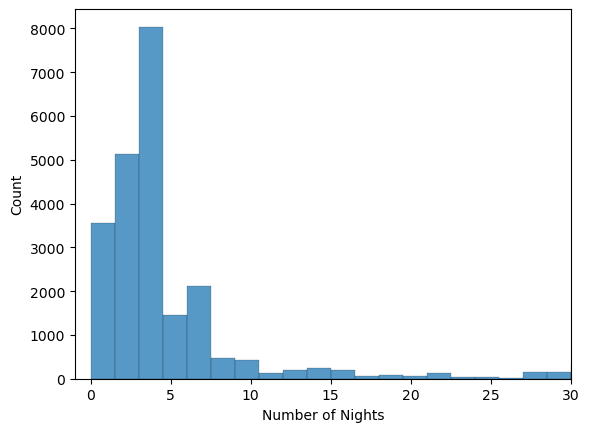

In [10]:
sns.histplot(data=searches, x='n_nights', binwidth=1.5)
plt.xlim(-1, 30)
plt.xlabel('Number of Nights')
plt.show()

Most of the users were looking for a short period of stay that is less than a week. The mean for the `n_nights` is also 7.6 nights, showing the majority of users are looking for a stay for their short trip in Dublin. The histogram is also right skewed. We can see there are a lot of outliers after approximately 7 nights stay from the below boxplot.

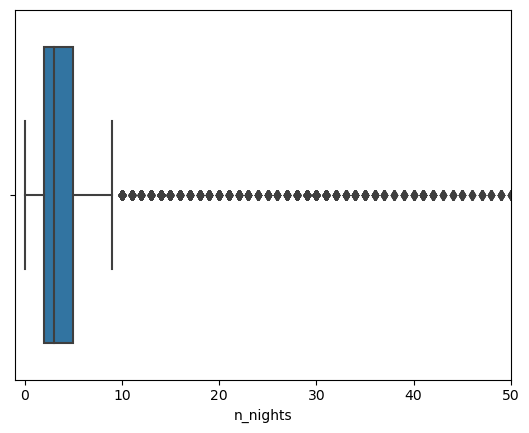

In [11]:
sns.boxplot(data=searches, x='n_nights')
plt.xlim(-1, 50)
plt.show()

In [12]:
# Change dtype to datetime for checkin and checkout data
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  object        
 1   id_user               35737 non-null  object        
 2   ds_checkin            23888 non-null  datetime64[ns]
 3   ds_checkout           23888 non-null  datetime64[ns]
 4   n_searches            35737 non-null  int64         
 5   n_nights              23888 non-null  float64       
 6   n_guests_min          35737 non-null  int64         
 7   n_guests_max          35737 non-null  int64         
 8   origin_country        35737 non-null  object        
 9   filter_price_min      13322 non-null  float64       
 10  filter_price_max      13322 non-null  float64       
 11  filter_room_types     16191 non-null  object        
 12  filter_neighborhoods  1346 non-null   object        
dtypes: datetime64[ns

In [13]:
# Get only the months from checkin
searches['checkin_month'] = searches['ds_checkin'].dt.month
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,checkin_month
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN,10.0
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN,10.0
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN,11.0
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,1,NaN,1,1,IE,NaN,NaN,NaN,NaN,NaN


/Users/eunaecho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


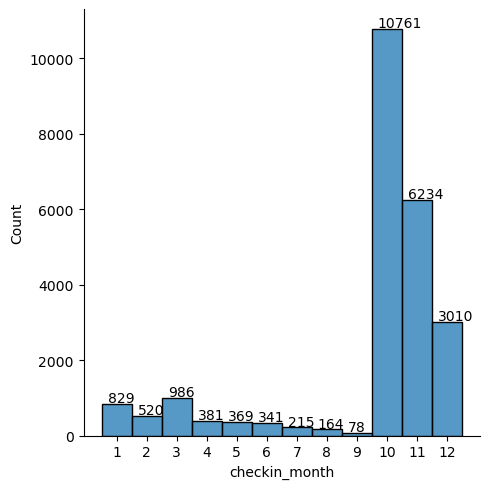

In [14]:
# labels to be used as a xtick on our plot
labels = [i+1 for i in range(12)]

# Count the number of check-ins according to their months
month_counts = searches.groupby('checkin_month')['checkin_month'].count().tolist()

sns.displot(data=searches, x='checkin_month', bins=range(1,14), discrete=True)
plt.xticks(labels)
for i, count in enumerate(month_counts):
    plt.annotate(count, xy=(i+0.7, count+50))
plt.show()

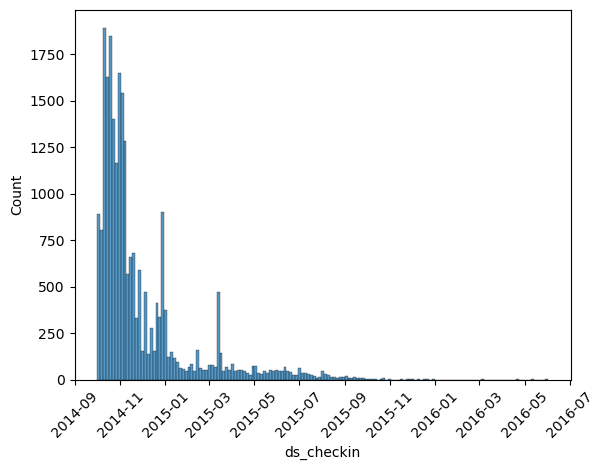

In [15]:
sns.histplot(data=searches, x='ds_checkin')
plt.xticks(rotation=45)
plt.show()

Dublin seems to be very popular during October, however this doesn't seems to be a pattern every year. Majority of users searched for the October only during 2014. The search date for check-in was mostly concentrated during 2014 winter then the number plummeted after that. 

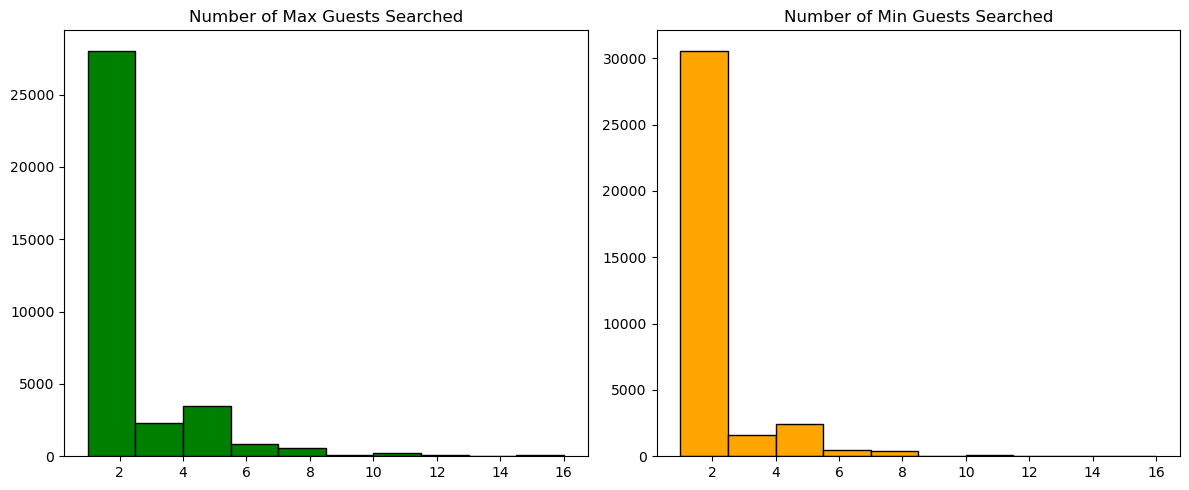

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(data=searches, x='n_guests_max', color='green', edgecolor='black')
axes[0].set_title('Number of Max Guests Searched')

axes[1].hist(data=searches, x='n_guests_min', color='orange', edgecolor='black')
axes[1].set_title('Number of Min Guests Searched')

plt.tight_layout()
plt.show()

Majority of users have 1~2 guests which would mean they will most likely look for a place with small rooms or beds. 

/Users/eunaecho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


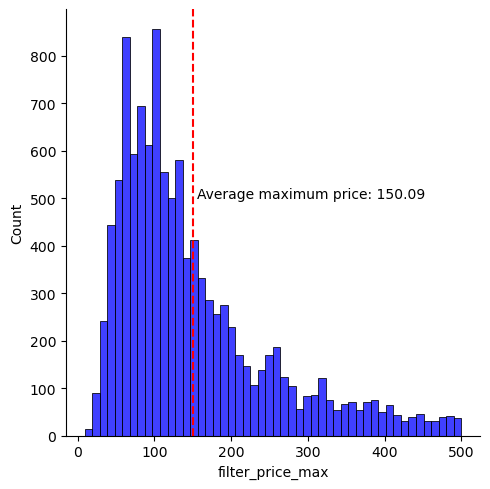

In [17]:
# filter the max price only up to 500
searches_maxprice_removed = searches[searches['filter_price_max'] <= 500]

# get the average max price
mean_max_price = searches_maxprice_removed['filter_price_max'].mean()

#Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color='blue')
plt.axvline(mean_max_price, color='red', linestyle='--')
plt.annotate(f"Average maximum price: {mean_max_price:.2f}", xy=(mean_max_price+5, 500))
plt.show()

According to the `searches.describe()` data, we can see there are big gap between the 75% point (301) and max point (1073742000) of `filter_price_max`. So we will only filter the max price up to 500 just to give a little more space in investigating the maximum price tendency the users search. 

Most of the max price is set around more or less than 100. 

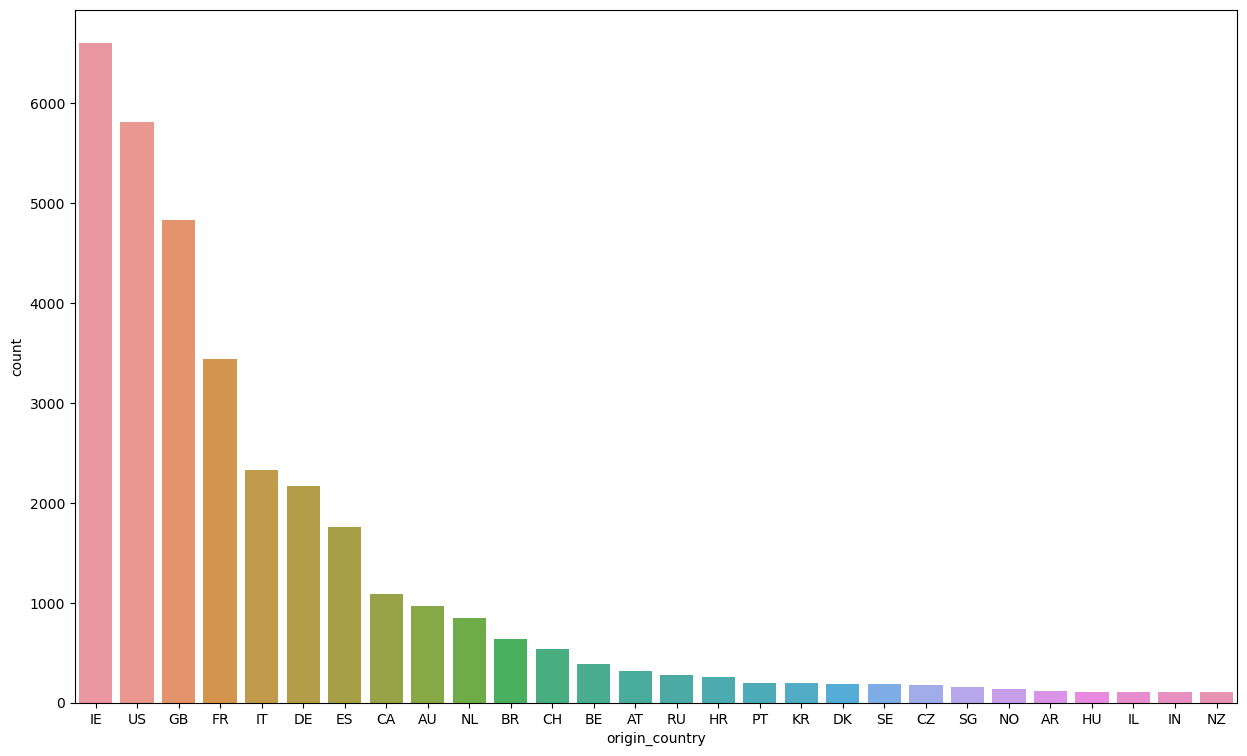

In [18]:
plt.figure(figsize=(15,9))

# Set a threshold to 100 to simplify the plot 
threshold=100

# Count the number of countries that the search was made
country_counts = searches['origin_country'].value_counts()

# Limit the categories to plot that are higher or the same as the threshold
categories_to_plot = country_counts[country_counts >= threshold].index

sns.countplot(data=searches, x='origin_country', order=categories_to_plot)
plt.show()

The top 3 countries that searched the accomodations through Airbnb were Ireland, United States and United Kingdom followed by nearest European countries such as France, Italy, Germany, Spain etc. 

## Data Exploration and Visualization - *contacts* dataframe

In [19]:
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [20]:
datetime_cols = ['ts_contact_at', 'ts_reply_at', 'ts_accepted_at', 'ts_booking_at', 'ds_checkin', 'ds_checkout']

# Convert the types to datetime using for loop to save time
for col in datetime_cols:
    contacts[col] = pd.to_datetime(contacts[col])

contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_guest        7823 non-null   object        
 1   id_host         7823 non-null   object        
 2   id_listing      7823 non-null   object        
 3   ts_contact_at   7823 non-null   datetime64[ns]
 4   ts_reply_at     7219 non-null   datetime64[ns]
 5   ts_accepted_at  3627 non-null   datetime64[ns]
 6   ts_booking_at   2174 non-null   datetime64[ns]
 7   ds_checkin      7823 non-null   datetime64[ns]
 8   ds_checkout     7823 non-null   datetime64[ns]
 9   n_guests        7823 non-null   int64         
 10  n_messages      7823 non-null   int64         
dtypes: datetime64[ns](6), int64(2), object(3)
memory usage: 672.4+ KB


In [21]:
contacts['reply_time_took'] = contacts['ts_reply_at'] - contacts['ts_contact_at']
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,reply_time_took
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,0 days 00:00:00
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,0 days 00:35:47
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,0 days 03:04:11
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,NaT
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,0 days 00:02:00


In [22]:
contacts['reply_time_took'].describe().reset_index()

,index,reply_time_took
0,count,7219
1,mean,0 days 09:39:16.042111095
2,std,1 days 11:16:52.040897238
3,min,0 days 00:00:00
4,25%,0 days 00:15:20
5,50%,0 days 01:42:34
6,75%,0 days 09:04:02
7,max,57 days 05:48:11


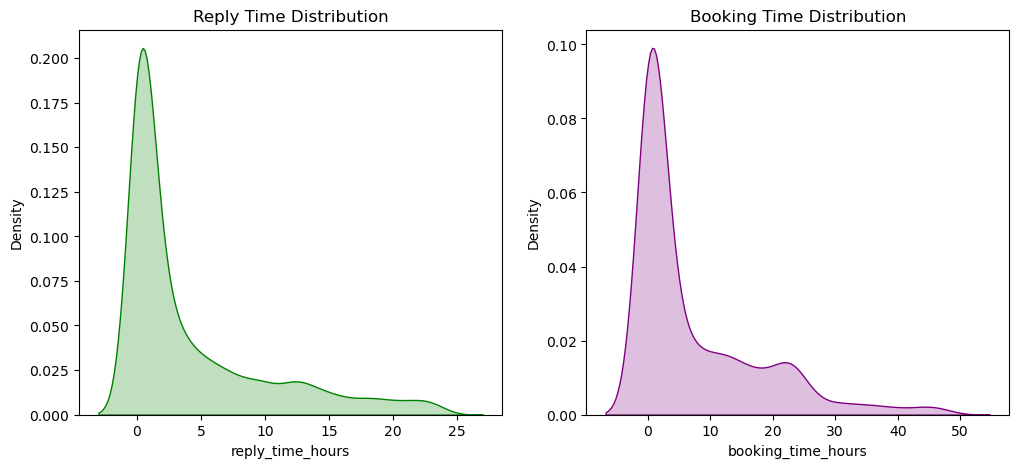

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Convert the times to hours
contacts['reply_time_hours'] = contacts['reply_time_took'].dt.total_seconds() / 3600
contacts['booking_time_hours'] = (contacts['ts_booking_at'] - contacts['ts_contact_at']).dt.total_seconds() / 3600

sns.kdeplot(contacts[contacts['reply_time_hours'] <= 24]['reply_time_hours'].dropna(), fill=True, ax=ax1, color='green')
ax1.set_title('Reply Time Distribution')

sns.kdeplot(contacts[contacts['booking_time_hours'] <= 48]['booking_time_hours'].dropna(), fill=True, ax=ax2, color='purple')
ax2.set_title('Booking Time Distribution')

plt.show()

- Host Reply Time: Most of the hosts replied less than **5 hours** to the inquires from the user. 

- User Booking Time: Most of the users who made a booking after inquiring to the host made the booking in less than **10 hours**. 

In [24]:
contacts['stay_days'] = contacts['ds_checkout'] - contacts['ds_checkin']

contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,reply_time_took,reply_time_hours,booking_time_hours,stay_days
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,0 days 00:00:00,0.000000,0.000000,2 days
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,0 days 00:35:47,0.596389,3.178611,3 days
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,0 days 03:04:11,3.069722,NaN,2 days
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,NaT,NaN,NaN,2 days
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,0 days 00:02:00,0.033333,0.504444,2 days


In [25]:
# Create a function that splits the stay_days to only have integers
def splitter(td):
    td = str(td).split(' ')[0]
    return td

contacts['stay_days'] = contacts['stay_days'].apply(splitter)
contacts['stay_days'].astype(str)

0       2
1       3
2       2
3       2
4       2
       ..
7818    3
7819    3
7820    3
7821    3
7822    7
Name: stay_days, Length: 7823, dtype: object

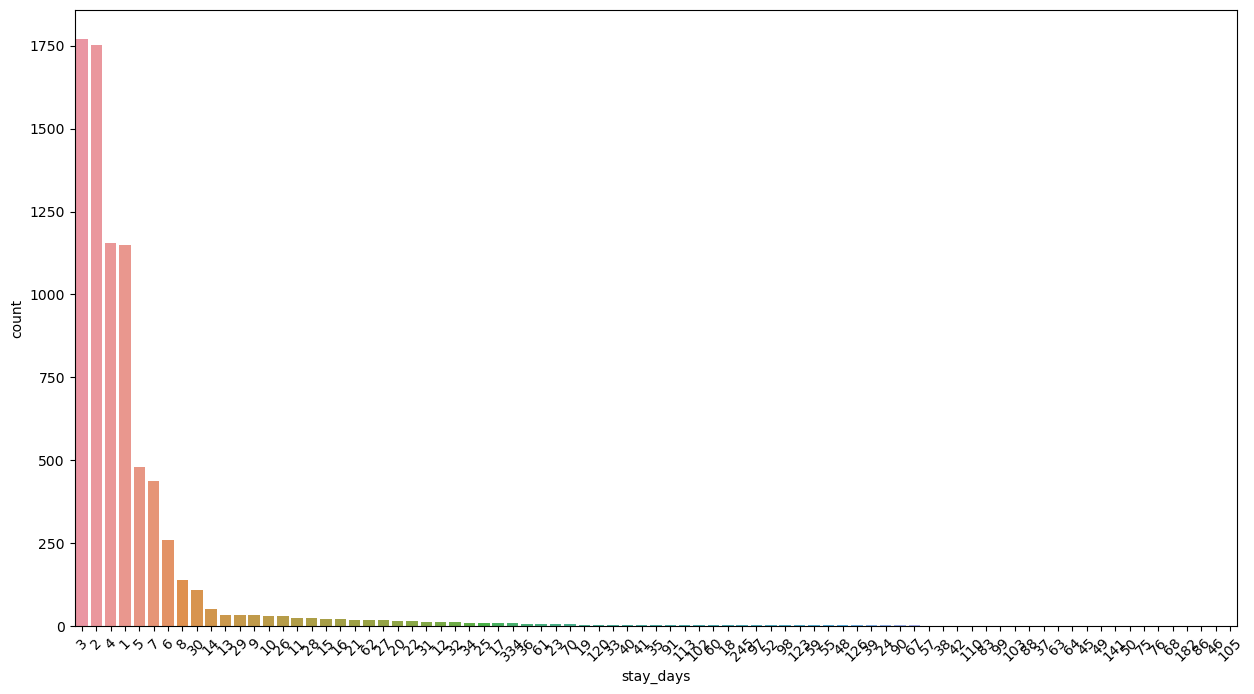

In [26]:
# Plot the stay_days
plt.figure(figsize=(15,8))
sns.countplot(data=contacts, x='stay_days', order=contacts['stay_days'].value_counts(ascending=False).index)
plt.xticks(rotation=45)
plt.show()

We can see most of the users visit Dublin on a short period of time **less than 5 days**. 2-3 days were the most popular days the stayed followed by 4 days and 1 day. The number of days drops drastically after that.

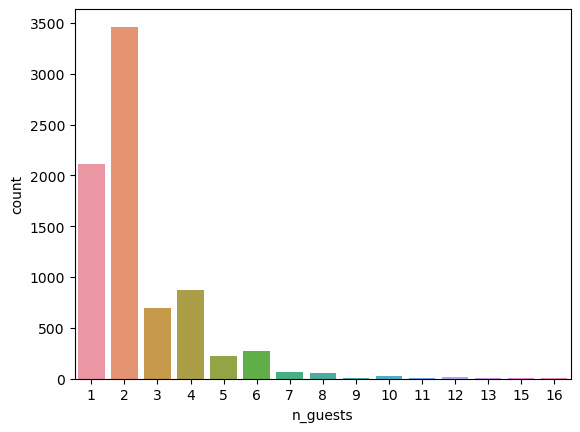

In [27]:
sns.countplot(contacts, x='n_guests')
plt.show()

The number of guests shows a similar pattern as in the number of guests we already saw on `searches` df. Solo or couple travel is quite common in Dublin.

Let's look at the booking rate. 

In [28]:
merged = pd.merge(searches, contacts, how='inner', left_on='id_user', right_on='id_guest')
merged['booked'] = np.where(np.isnan(merged['ts_booking_at']), False, True)
merged.head()

,ds,id_user,ds_checkin_x,ds_checkout_x,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,...,ts_booking_at,ds_checkin_y,ds_checkout_y,n_guests,n_messages,reply_time_took,reply_time_hours,booking_time_hours,stay_days,booked
0,2014-10-01,00dbfc14-e378-40c9-b841-28f60275109d,NaT,NaT,4,NaN,1,1,IT,NaN,...,NaT,2014-10-18,2014-10-22,3,4,0 days 00:30:45,0.512500,NaN,4,False
1,2014-10-01,00dbfc14-e378-40c9-b841-28f60275109d,NaT,NaT,4,NaN,1,1,IT,NaN,...,NaT,2014-10-18,2014-10-22,3,3,0 days 00:08:23,0.139722,NaN,4,False
2,2014-10-01,00dbfc14-e378-40c9-b841-28f60275109d,2014-10-18,2014-10-22,5,4.0,1,3,IT,NaN,...,NaT,2014-10-18,2014-10-22,3,4,0 days 00:30:45,0.512500,NaN,4,False
3,2014-10-01,00dbfc14-e378-40c9-b841-28f60275109d,2014-10-18,2014-10-22,5,4.0,1,3,IT,NaN,...,NaT,2014-10-18,2014-10-22,3,3,0 days 00:08:23,0.139722,NaN,4,False
4,2014-10-01,00fb5de4-9865-420f-bc85-22521121a1ca,NaT,NaT,4,NaN,1,1,DE,NaN,...,NaT,2014-10-03,2014-10-05,1,1,NaT,NaN,NaN,2,False


In [29]:
merged.columns

Index(['ds', 'id_user', 'ds_checkin_x', 'ds_checkout_x', 'n_searches',
       'n_nights', 'n_guests_min', 'n_guests_max', 'origin_country',
       'filter_price_min', 'filter_price_max', 'filter_room_types',
       'filter_neighborhoods', 'checkin_month', 'id_guest', 'id_host',
       'id_listing', 'ts_contact_at', 'ts_reply_at', 'ts_accepted_at',
       'ts_booking_at', 'ds_checkin_y', 'ds_checkout_y', 'n_guests',
       'n_messages', 'reply_time_took', 'reply_time_hours',
       'booking_time_hours', 'stay_days', 'booked'],
      dtype='object')

In [30]:
country_dataset = merged[['origin_country', 'booked']]

booked_count = country_dataset.groupby(['origin_country', 'booked']).agg({'origin_country':'count'})
booked_count.columns = ['count_booked']

country_count = country_dataset.groupby('origin_country').agg({'origin_country':'count'})
country_count.columns = ['total_count']

booked_country_merged = pd.merge(country_dataset, booked_count, how='left', on=['origin_country', 'booked'])
booked_country_merged = booked_country_merged.drop_duplicates()

booked_country_merged = pd.merge(booked_country_merged, country_count, how='left', on='origin_country')
booking_confirmed = booked_country_merged[booked_country_merged['booked'] == True]
booking_confirmed = booking_confirmed.copy()
booking_confirmed['booking_rate'] = booking_confirmed['count_booked'] / booking_confirmed['total_count']
booking_confirmed.sort_values(by='booking_rate', ascending=False, inplace=True)

# Drop rows where the booking_rate is equal to 1 since those countries have 
# very small number of total country and also having the booking rate to 100% is unrealistic. 
booking_confirmed = booking_confirmed[booking_confirmed['booking_rate'] != 1]
booking_confirmed.head()

,origin_country,booked,count_booked,total_count,booking_rate
116,BH,True,2,3,0.666667
96,IL,True,21,33,0.636364
23,KR,True,49,79,0.620253
60,TW,True,31,59,0.525424
54,CZ,True,47,93,0.505376


Now will visualize the data

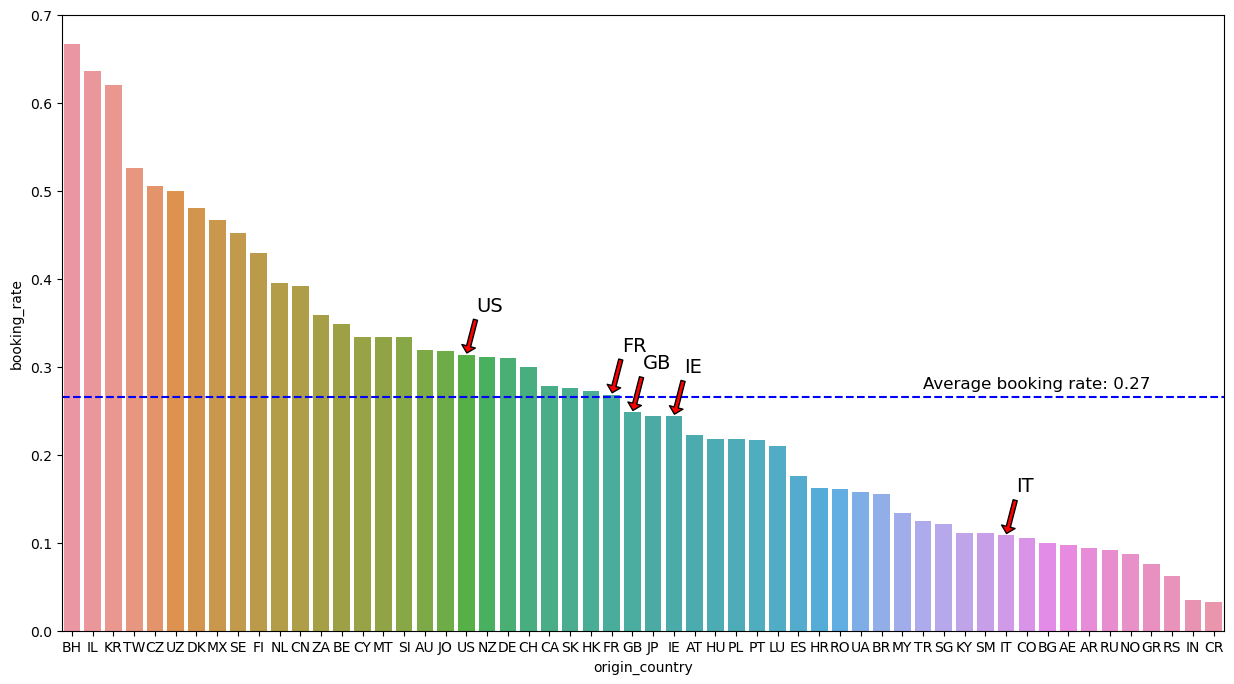

In [31]:
top_5 = ['US', 'FR', 'GB', 'IE', 'IT']

# indices of the top 5 countries to annotate
top5_is = booking_confirmed.reset_index()
top5_is = top5_is[top5_is['origin_country'].isin(top_5)].index.tolist()

# y position for the annotation of top 5 countries
top_5_ys = booking_confirmed[booking_confirmed['origin_country'].isin(top_5)]['booking_rate'].tolist()

# Average booking rate
avg_booking_rate = booking_confirmed['booking_rate'].mean()

# Plot the booking_confirmed df
fig, ax =plt.subplots(figsize=(15,8))
sns.barplot(data=booking_confirmed, x='origin_country', y='booking_rate')
plt.axhline(avg_booking_rate, color='blue', linestyle='--')

# Add annotation for the average horizontal line
plt.annotate(f"Average booking rate: {avg_booking_rate:.2f}", 
             xy=(len(booking_confirmed)-15, avg_booking_rate+0.01), size=12)

# Add annotation for the top 5 countries
for i, j in enumerate(top5_is):
    plt.annotate(top_5[i], xy=(j, top_5_ys[i]), xytext=(j+0.5, top_5_ys[i]+0.05), size=14,
                 arrowprops=dict(facecolor='red', shrink=0.05, width=3, headwidth=10, headlength=5))

plt.show()

The country with the most highest booking rate was Baharin with 66.6%, and Israel (63.6%), Korea (62.0%), Taiwan (52.5%) and Czech Republic (50.5%) followed. 

The country with the lowest booking rate goes to Costa Rica with the booking rate of only 3%. India, Serbia, Greece and Norway followed. 

### Marketing that targets on top 5 countries needed
#### *Booking rate of top 4 countries except the US below average*

To follow the business requirement to check what data we should be focusing on to increase the number of booking in Dublin, we will check with the booking rate from the countries that visits Dublin the most. Top 5 countries that did the search the most through Airbnb was Ireland, United States, United Kingdom, France and Italy. 

Even if the users from top 5 countries are willing to visit Dublin the most, the booking rate of most of the countries was lower than the average booking rate of the total country. 

Only the US was slightly above the average line. All other countries (FR, GB, IE, IT) were below average. This could bring an insight on to improving the users booking rate on Airbnb. <u>The marketing should target users from top 5 countries and deliver better user experience for those users to finally book the accomodations through Airbnb.</u>

We will check if the price was the reason for the low booking rate on top 5 countries.

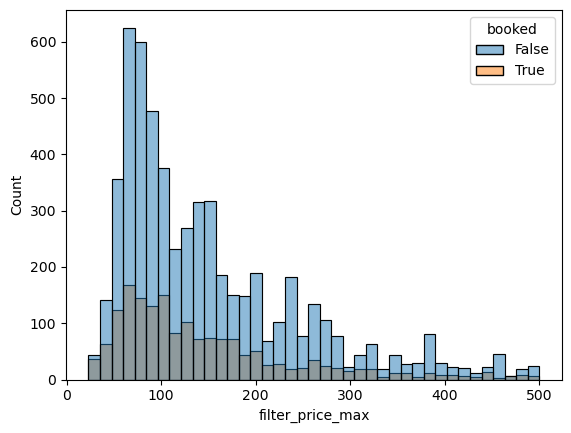

In [32]:
filtered = merged[merged['filter_price_max'] <= 500]
top5_filtered = filtered[filtered['origin_country'].isin(top_5)]

top5_max_price = top5_filtered[['origin_country', 'filter_price_max', 'booked']]

sns.histplot(data=top5_max_price, x='filter_price_max', hue='booked', alpha=0.5)
plt.show()

From the top histogram, we cannot say the price was the reason for the users not finalizing the booking through Airbnb. If the price were set up too high and that was the main reason for the users not making a booking, then the `False` plot for booking should have shown left skewed, but both `False` and `True` are showing a similar pattern of being right skewed. We need more investigation on why the booking rate is low from the countries that show the highest search through Airbnb.

We would like to check if the hosts' reply time was the reason for the users from top 5 countries didn't made the final booking. 

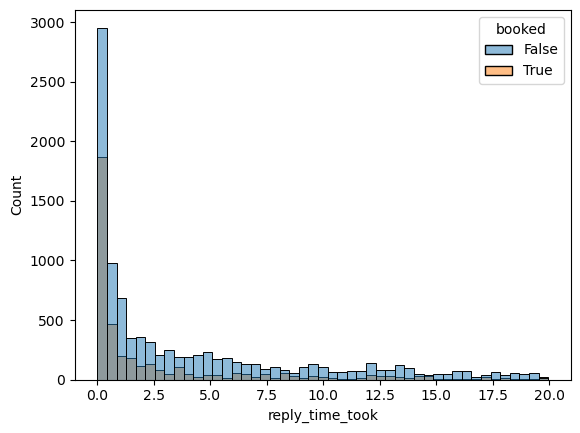

In [33]:
top5_merge_filtered = merged[merged['origin_country'].isin(top_5)]
top5_reply_time = top5_merge_filtered[['reply_time_took', 'booked']]

top5_reply_time = top5_reply_time.copy()
top5_reply_time['reply_time_took'] = top5_reply_time['reply_time_took'].dt.total_seconds() / 3600
reply_filter = top5_reply_time[top5_reply_time['reply_time_took'] <= 20]

sns.histplot(reply_filter, x='reply_time_took', hue='booked')
plt.show()

The histogram is showing a similar pattern as well as with the price histogram. Reply time didn't seem to be the main reason for the users from top 5 countries not making a final booking through Airbnb. 

Data with details of the quality of the accomodations are needed to have a deeper understanding of this. 

Now let's look at the hosts accepting inquiries from the guests. 

In [34]:
host_msg_accept = merged[['ts_contact_at', 'origin_country', 'ts_accepted_at', 'ds_checkin_y', 'ds_checkout_y', 'stay_days', 'n_guests', 'n_messages', 'booked']]
host_msg_accept_copy = host_msg_accept.copy()
host_msg_accept_copy['msg_accepted'] = np.where(np.isnan(host_msg_accept_copy['ts_accepted_at']), False, True)
host_msg_accept_copy

,ts_contact_at,origin_country,ts_accepted_at,ds_checkin_y,ds_checkout_y,stay_days,n_guests,n_messages,booked,msg_accepted
0,2014-10-01 15:37:51,IT,2014-10-02 13:42:44,2014-10-18,2014-10-22,4,3,4,False,True
1,2014-10-01 15:39:14,IT,2014-10-01 15:47:37,2014-10-18,2014-10-22,4,3,3,False,True
2,2014-10-01 15:37:51,IT,2014-10-02 13:42:44,2014-10-18,2014-10-22,4,3,4,False,True
3,2014-10-01 15:39:14,IT,2014-10-01 15:47:37,2014-10-18,2014-10-22,4,3,3,False,True
4,2014-09-29 20:48:07,DE,NaT,2014-10-03,2014-10-05,2,1,1,False,False
...,...,...,...,...,...,...,...,...,...,...
28531,2014-10-14 14:04:00,CH,NaT,2014-10-18,2014-10-19,1,2,1,False,False
28532,2014-10-14 14:34:02,CH,NaT,2014-10-18,2014-10-19,1,2,3,False,False
28533,2014-10-14 14:07:36,CH,NaT,2014-10-18,2014-10-19,1,2,2,False,False
28534,2014-10-14 14:01:08,CH,NaT,2014-10-18,2014-10-19,1,2,3,False,False


In [35]:
host_msg_accept_copy['contact_hours'] = host_msg_accept_copy['ts_contact_at'].dt.hour
host_msg_accept_copy.head()

,ts_contact_at,origin_country,ts_accepted_at,ds_checkin_y,ds_checkout_y,stay_days,n_guests,n_messages,booked,msg_accepted,contact_hours
0,2014-10-01 15:37:51,IT,2014-10-02 13:42:44,2014-10-18,2014-10-22,4,3,4,False,True,15
1,2014-10-01 15:39:14,IT,2014-10-01 15:47:37,2014-10-18,2014-10-22,4,3,3,False,True,15
2,2014-10-01 15:37:51,IT,2014-10-02 13:42:44,2014-10-18,2014-10-22,4,3,4,False,True,15
3,2014-10-01 15:39:14,IT,2014-10-01 15:47:37,2014-10-18,2014-10-22,4,3,3,False,True,15
4,2014-09-29 20:48:07,DE,NaT,2014-10-03,2014-10-05,2,1,1,False,False,20


/Users/eunaecho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


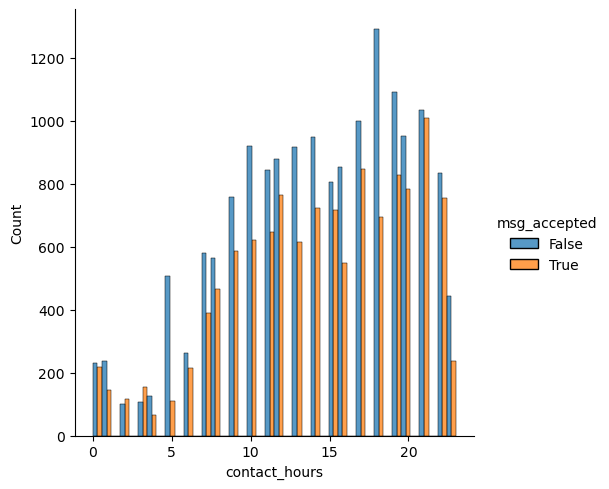

In [36]:
sns.displot(host_msg_accept_copy, x='contact_hours', hue='msg_accepted', multiple='dodge')
plt.show()

From the graph we can see the hosts tend to accept the inquiry around `9-10pm`. They tend to not accept the message on a very early morning like `5am`. 

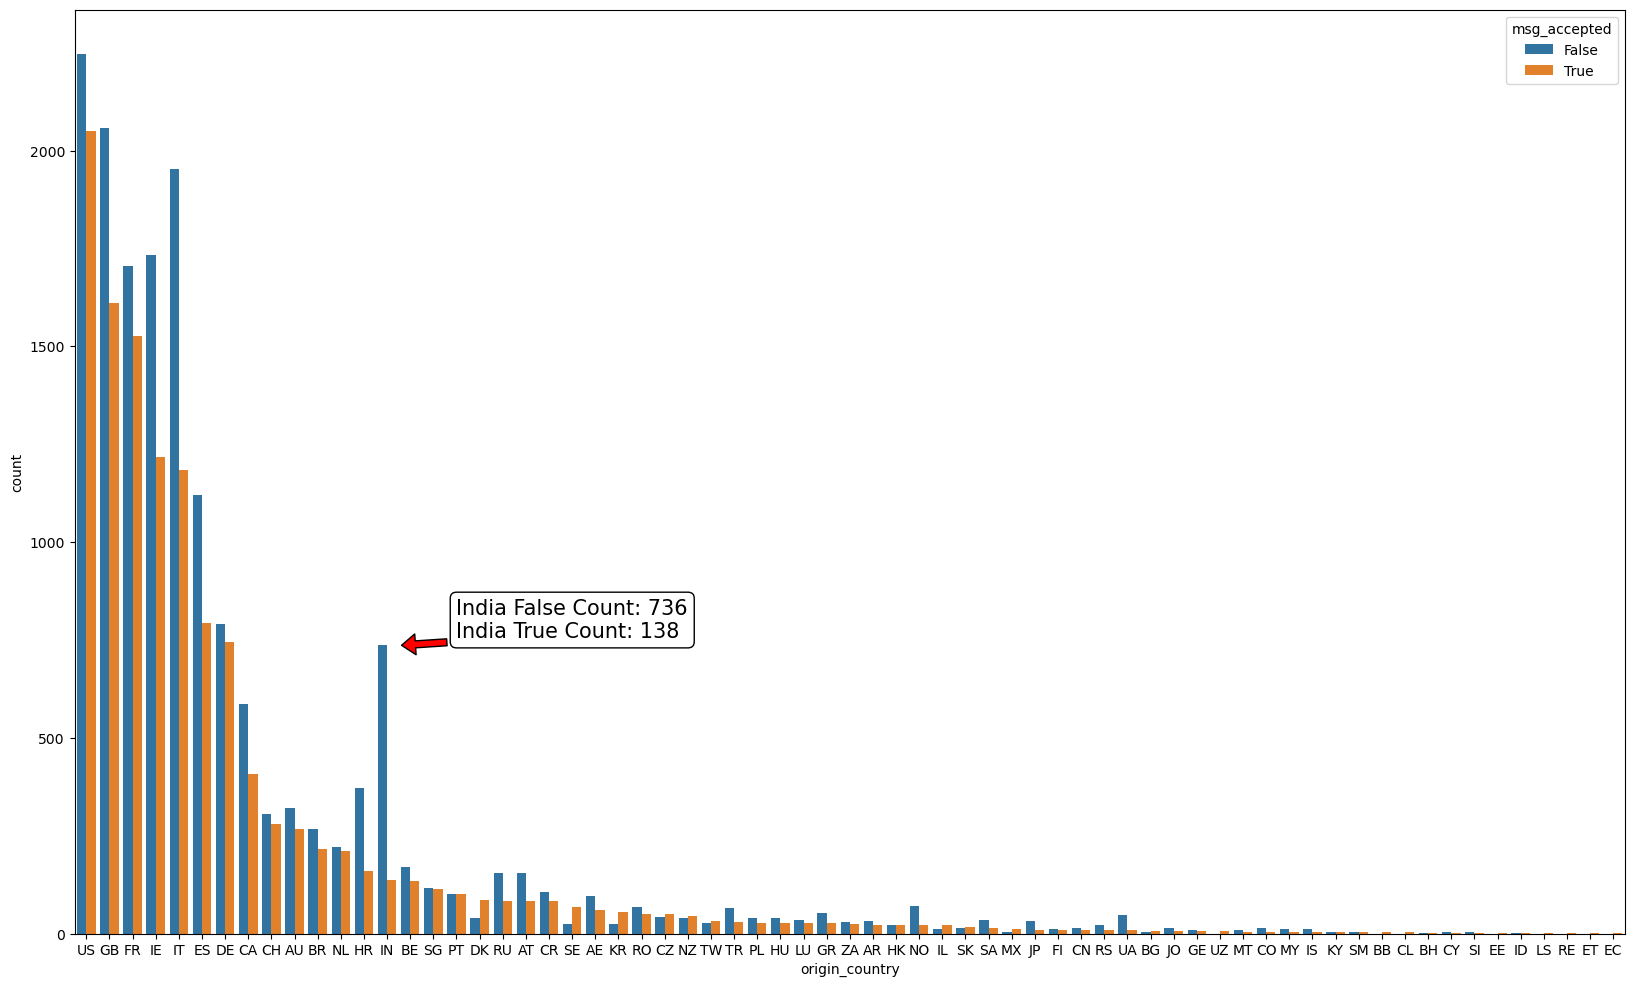

In [37]:
# Filter for msg_accepted == False and count occurrences by origin_country
true_counts = (host_msg_accept_copy[host_msg_accept_copy['msg_accepted'] == True]
                .groupby('origin_country')
                .size()
                .sort_values(ascending=False))

# Get the sorted order of origin_country
sorted_order = true_counts.index

# Data related to India
true_counts_df = true_counts.reset_index()
india_true = true_counts_df[true_counts_df['origin_country'] == 'IN']
india_true_n = india_true.iloc[0, 1]

false_counts = (host_msg_accept_copy[host_msg_accept_copy['msg_accepted'] == False]
                .groupby('origin_country')
                .size()
                .sort_values(ascending=False))
false_counts_df = false_counts.reset_index()
india_false = false_counts_df[false_counts_df['origin_country'] == 'IN']
india_false_n = india_false.iloc[0, 1]


# Plot the histogram with sorted order
plt.figure(figsize=(20, 12))
sns.countplot(host_msg_accept_copy, x='origin_country', hue='msg_accepted', 
             order=sorted_order)
plt.annotate(f"India False Count: {india_false_n}\nIndia True Count: {india_true_n}", xy=(13.5, india_false_n), 
             size=15, 
             xytext=(16, india_false_n+20),
             arrowprops=dict(facecolor='red', shrink=0.05, width=5, headwidth=15, headlength=10), 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()


While most of the countries have the inquiry being accepted and rejected almost the same, `India` showed a very strong sign from the hosts that they tend not to accept the inquiry. The inquiry not being accepted were 736 while only 138 messages were accepted by the host. 

## Conclusion

We need to know the following info which are,

- what guests are searching for in Dublin,
- which inquiries hosts tend to accept.

1. **What guests are searching in for in Dublin**

- Most of the guests in Dublin were in small in size; solo or couple traveler and were looking for a room that could accomodate them only for a short period of time. It was mostly less than a week and 1-4 days were most popular.

2. **Which inquires hosts tend to accept**

- Hosts like to accept the inquiry message during their free time of the day; 9-10pm which is considered to be a chilling time for most of the people, time to wrap up their day and getting ready to sleep, hosts tend to reply the most during that hours. 

- Peculiar case with `India` showing a high tendency of hosts not accepting their inquiry. While most of the countries showed a similar numbers of inquiry being accepted and not, India was outstanding with their rejection number.

We have two business requirements which are,

- BR1: what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
- BR2: what other data would be useful to have to deepen the analysis and understanding. 

1. **BR1**

- Dublin showed to be a very popular destination for visitors during October, but the pattern only showed during 2014. Need more investigation if the hosts were only actively advertising the accomodations on 2014 or if there was a promotion that lead the users to use the app actively during that time.


2. **BR2**

- There are top 5 countries that uses Airbnb the most; `'US', 'FR', 'GB', 'IE', 'IT'`. But the booking rate of those countries were low or below average. 
- Investigated to see if the price being set too high and/or hosts repling too late to be the reason for the low booking rate for the top 5 countries, but it didn't show any significant pattern to understand the low booking rates.
- There should be more investigation needed with detailed data that contains the condition of the accomodations to acknowledge the reasoning of the low booking rates on top 5 countries. 